# Data Bootcamp Final Project: NFL Salary Composition in the 2017 Season
<br>

<div class="inline-block"> 
<img src="http://pluspng.com/img-png/nfl-logo-png-icons-logos-emojis-iconic-brands-2000.png" style="width: 50px;"/> </div> 

**Author: Chad P. Tsikalas**

**Email: [cpt268@stern.nyu.edu](cpt268@stern.nyu.edu)**

The salary cap was instituted in the National Football League in 1994 in an attempt to promote parity and fair competition among the league. Starting at \$34 million, the salary cap has grown every year and is calculated by equally distributing league revenues. In 2017, the salary cap was $167 million. The new rule achieved its goals as NFL dynasties and long-term dominance has declined since the inception of the salary cap. Each year, General Managers (GMs) must distribute their fixed cap among 53 active players, injured reserve players, and practice squad players. Despite a few obscure ceilings and floors, GMs can distribute their salary cap in any way. This analysis will research a) the way that GMs distribute their salary cap and b) the effects of different salary cap distributions among position groups. 

## Data Report

The data for this project comes from [Spotrac](http://www.spotrac.com), a division of USA Today Sports Media Group. Spotrac is the leading salary aggregator across all major American sports leagues. It is a trusted resource that has been sourced in the [New York Times](https://archive.nytimes.com/www.nytimes.com/interactive/2013/10/18/sports/The-Quarterbacks-Share.html), [Wall Street Journal](https://www.wsj.com/articles/the-jets-have-reasons-to-let-muhammad-wilkerson-walk-1433899397), [Washington Post](https://www.washingtonpost.com/lifestyle/magazine/whos-the-highest-paid-athlete-in-dc-/2015/02/12/16509416-856a-11e4-b9b7-b8632ae73d25_story.html?noredirect=on&utm_term=.8bab8f85a77a), and many others.  The Spotrac datasets, specifically for the NFL, combine all forms of salary (base, signing bonus, incentive-based, etc.) to produce a final "cap hit" (total amount the player counts against the team's salary cap) for each player.

The data was acquired from Spotrac by scraping the website using the BeautifulSoup package. Because of the hit-or-miss nature of scraping and a worry that it may not work when the time comes to grade my project, the data was downloaded to a local file and then uploaded to my GitHub repository. The scrape, in its entirety, can be found at https://github.com/ChadT35/Data_Bootcamp_Final_Project/blob/master/SpotRac_Scrape.ipynb.



## Packages

The following packages will be used throughout the code:
- `display` generates the NFL logo above
- `Pandas` core tool that produces and manipulates dataframes
- `Matplotlib` plotting
- `numpy` mathematical operations
- `functools`/`reduce` merge many datasets into one dataframe

In [574]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from IPython.display import display, Image
plt.style.use('fivethirtyeight')

## Bringing in Raw Data

The following link will bring in the data from the Spotrac scrape. I converted the data into a Pandas dataframe and changed Cap Hit (the only column needed) into a float within the SpotracScrape file.


In [575]:
salaries_url = "https://github.com/ChadT35/Data_Bootcamp_Final_Project/blob/master/SpotracScrapeData.xlsx?raw=true"

In [576]:
dfsal = pd.read_excel(salaries_url)
dfsal.head(10)

,Player,Team,Side,Pos.,Base_Salary,Signing_Bonus,Roster_Bonus,Option_Bonus,Workout_Bonus,Restruc_Bonus,Misc.,Dead_Cap,Cap_Hit,Cap%
1,Joel Bitonio,Browns,Off,G,"$3,164,777","$573,036","$8,500,000",-,-,-,-,"($17,737,813)",12237813.0,7.81
2,Kevin Zeitler,Browns,Off,G,"$6,000,000","$2,400,000",-,-,-,-,-,"($23,000,000)",8400000.0,5.36
3,Myles Garrett,Browns,Def,DE,"$465,000","$5,064,501",-,-,-,-,-,"($30,412,255)",5529501.0,3.53
4,Christian Kirksey,Browns,Def,ILB,"$3,797,000","$1,365,625",-,-,-,-,-,"($14,962,625)",5162625.0,3.30
5,J.C. Tretter,Browns,Def,C,"$2,000,000","$1,500,000","$109,375",-,-,-,-,"($6,500,000)",3609375.0,2.30
6,Jamar Taylor,Browns,Def,CB,"$2,500,000","$750,000",-,-,"$25,000",-,-,"($4,775,000)",3275000.0,2.09
7,Danny Shelton,Browns,Def,DT,"$1,498,970","$1,692,939",-,-,-,-,-,"($6,915,802)",3191909.0,2.04
8,Britton Colquitt,Browns,ST,P,"$1,650,000",-,"$1,500,000",-,-,-,-,"($5,700,000)",3150000.0,2.01
9,Isaiah Crowell,Browns,Off,RB,"$2,746,000",-,-,-,-,-,-,-,2746000.0,1.75
10,Corey Coleman,Browns,Off,WR,"$979,773","$1,669,090",-,-,-,-,-,"($9,535,907)",2648863.0,1.69


For readability, a new column will be created that shows the cap hit in millions.

In [577]:
dfsal["Cap_Hit_$Ms"]=dfsal["Cap_Hit"]/1000000
dfsal.head(10)

,Player,Team,Side,Pos.,Base_Salary,Signing_Bonus,Roster_Bonus,Option_Bonus,Workout_Bonus,Restruc_Bonus,Misc.,Dead_Cap,Cap_Hit,Cap%,Cap_Hit_$Ms
1,Joel Bitonio,Browns,Off,G,"$3,164,777","$573,036","$8,500,000",-,-,-,-,"($17,737,813)",12237813.0,7.81,12.237813
2,Kevin Zeitler,Browns,Off,G,"$6,000,000","$2,400,000",-,-,-,-,-,"($23,000,000)",8400000.0,5.36,8.400000
3,Myles Garrett,Browns,Def,DE,"$465,000","$5,064,501",-,-,-,-,-,"($30,412,255)",5529501.0,3.53,5.529501
4,Christian Kirksey,Browns,Def,ILB,"$3,797,000","$1,365,625",-,-,-,-,-,"($14,962,625)",5162625.0,3.30,5.162625
5,J.C. Tretter,Browns,Def,C,"$2,000,000","$1,500,000","$109,375",-,-,-,-,"($6,500,000)",3609375.0,2.30,3.609375
6,Jamar Taylor,Browns,Def,CB,"$2,500,000","$750,000",-,-,"$25,000",-,-,"($4,775,000)",3275000.0,2.09,3.275000
7,Danny Shelton,Browns,Def,DT,"$1,498,970","$1,692,939",-,-,-,-,-,"($6,915,802)",3191909.0,2.04,3.191909
8,Britton Colquitt,Browns,ST,P,"$1,650,000",-,"$1,500,000",-,-,-,-,"($5,700,000)",3150000.0,2.01,3.150000
9,Isaiah Crowell,Browns,Off,RB,"$2,746,000",-,-,-,-,-,-,-,2746000.0,1.75,2.746000
10,Corey Coleman,Browns,Off,WR,"$979,773","$1,669,090",-,-,-,-,-,"($9,535,907)",2648863.0,1.69,2.648863


Every NFL player has a $position$ they play for the team, with 11 starting positions on both offense and defense and 2 more on special teams (punter, kicker). The list below shows an abbreviation for each starting position.

In [578]:
dfsal["Pos."].unique()

array(['G', 'DE', 'ILB', 'C', 'CB', 'DT', 'P', 'RB', 'WR', 'S', 'TE', 'LS',
       'OLB', 'QB', 'T', 'FB', 'K', 'SS', 'LT', 'FS', 'RT', 'LB'], dtype=object)

Positions can be allocated into $groups$ that will be called "position groups" for this analysis. The code below is a function that assigns players their position group. The primary position groups are as follows:

- #### QB: 
    Quarterbacks
- #### O_Line: 
    Offensive linemen (tackles, guards, centers)
- #### Backfield: 
    Running backs (running back, full back)
- #### Receiving_Core: 
    Receivers and tight ends
- #### D_Line: 
    Defensive linemen (nose tackle, defensive end, defensive tackle)
- #### Linebackers: 
    Linebackers (linebackers, outside linebacker, inside lineback)
- #### Secondary: 
    Defensive coverage (cornerback, safety, free safety, strong safety)
- #### Special Teams: 
    Kickers, punters, long snappers

In [579]:
def setPosGroup(position):
    if position == "QB":
        return "QB"
    elif position == "T" or position == "G" or position == "C" or position == "RT" or position == "LT":
        return "O_Line"
    elif position == "RB" or position == "FB":
        return "Backfield"
    elif position == "WR" or position == "TE":
        return "Receiving_Core"
    elif position == "NT" or position == "DE" or position == "DT":
        return "D_Line"
    elif position == "LB" or position == "OLB" or position == "ILB":
        return "Linebackers"
    elif position == "CB" or position == "S" or position == "FS" or position == "SS":
        return "Secondary"
    elif position == "K" or position == "P" or position == "LS":
        return "Spec_Teams"

This creates a new column that assigns the primary position group:

In [580]:
dfsal["Pos_Group"] = dfsal["Pos."].apply(setPosGroup)
dfsal.head(10)

,Player,Team,Side,Pos.,Base_Salary,Signing_Bonus,Roster_Bonus,Option_Bonus,Workout_Bonus,Restruc_Bonus,Misc.,Dead_Cap,Cap_Hit,Cap%,Cap_Hit_$Ms,Pos_Group
1,Joel Bitonio,Browns,Off,G,"$3,164,777","$573,036","$8,500,000",-,-,-,-,"($17,737,813)",12237813.0,7.81,12.237813,O_Line
2,Kevin Zeitler,Browns,Off,G,"$6,000,000","$2,400,000",-,-,-,-,-,"($23,000,000)",8400000.0,5.36,8.400000,O_Line
3,Myles Garrett,Browns,Def,DE,"$465,000","$5,064,501",-,-,-,-,-,"($30,412,255)",5529501.0,3.53,5.529501,D_Line
4,Christian Kirksey,Browns,Def,ILB,"$3,797,000","$1,365,625",-,-,-,-,-,"($14,962,625)",5162625.0,3.30,5.162625,Linebackers
5,J.C. Tretter,Browns,Def,C,"$2,000,000","$1,500,000","$109,375",-,-,-,-,"($6,500,000)",3609375.0,2.30,3.609375,O_Line
6,Jamar Taylor,Browns,Def,CB,"$2,500,000","$750,000",-,-,"$25,000",-,-,"($4,775,000)",3275000.0,2.09,3.275000,Secondary
7,Danny Shelton,Browns,Def,DT,"$1,498,970","$1,692,939",-,-,-,-,-,"($6,915,802)",3191909.0,2.04,3.191909,D_Line
8,Britton Colquitt,Browns,ST,P,"$1,650,000",-,"$1,500,000",-,-,-,-,"($5,700,000)",3150000.0,2.01,3.150000,Spec_Teams
9,Isaiah Crowell,Browns,Off,RB,"$2,746,000",-,-,-,-,-,-,-,2746000.0,1.75,2.746000,Backfield
10,Corey Coleman,Browns,Off,WR,"$979,773","$1,669,090",-,-,-,-,-,"($9,535,907)",2648863.0,1.69,2.648863,Receiving_Core


Positions can be grouped in a few different ways. The following secondary position grouping has broader categories that will also be valuable for analysis.

- #### Skill: 
    Any player that handles the ball on offense (quarterbacks, running backs, full backs, wide receivers, tight ends)
- #### O_Line: 
    Offensive linemen (tackles, guards, centers)
- #### Front_Seven: 
    Defensive linemen and linebackers (nose tackle, defensive end, defensive tackle, linebackers, outside linebackers, inside linebackers)
- #### Secondary: 
    Defensive coverage (cornerback, safety, free safety, strong safety)
- #### Special Teams: 
    Kickers, punters, long snappers

In [581]:
def setSecPosGroup(position):
    if position == "QB" or position == "RB" or position == "FB" or position == "WR" or position == "TE":
        return "Skill"
    elif position == "T" or position == "G" or position == "C" or position == "RT" or position == "LT":
        return "O_Line_2"
    elif (position == "NT" or position == "DE" or position == "DT" 
          or position == "LB" or position == "OLB" or position == "ILB"):
        return "Front_Seven"
    elif position == "CB" or position == "S" or position == "FS" or position == "SS":
        return "Secondary_2"
    elif position == "P" or position == "K" or position == "LS":
        return "Spec_Teams_2"

This creates a new column that assigns the secondary position group.

In [582]:
dfsal["2nd_Pos_Group"] = dfsal["Pos."].apply(setSecPosGroup)
dfsal.head(10)

,Player,Team,Side,Pos.,Base_Salary,Signing_Bonus,Roster_Bonus,Option_Bonus,Workout_Bonus,Restruc_Bonus,Misc.,Dead_Cap,Cap_Hit,Cap%,Cap_Hit_$Ms,Pos_Group,2nd_Pos_Group
1,Joel Bitonio,Browns,Off,G,"$3,164,777","$573,036","$8,500,000",-,-,-,-,"($17,737,813)",12237813.0,7.81,12.237813,O_Line,O_Line_2
2,Kevin Zeitler,Browns,Off,G,"$6,000,000","$2,400,000",-,-,-,-,-,"($23,000,000)",8400000.0,5.36,8.400000,O_Line,O_Line_2
3,Myles Garrett,Browns,Def,DE,"$465,000","$5,064,501",-,-,-,-,-,"($30,412,255)",5529501.0,3.53,5.529501,D_Line,Front_Seven
4,Christian Kirksey,Browns,Def,ILB,"$3,797,000","$1,365,625",-,-,-,-,-,"($14,962,625)",5162625.0,3.30,5.162625,Linebackers,Front_Seven
5,J.C. Tretter,Browns,Def,C,"$2,000,000","$1,500,000","$109,375",-,-,-,-,"($6,500,000)",3609375.0,2.30,3.609375,O_Line,O_Line_2
6,Jamar Taylor,Browns,Def,CB,"$2,500,000","$750,000",-,-,"$25,000",-,-,"($4,775,000)",3275000.0,2.09,3.275000,Secondary,Secondary_2
7,Danny Shelton,Browns,Def,DT,"$1,498,970","$1,692,939",-,-,-,-,-,"($6,915,802)",3191909.0,2.04,3.191909,D_Line,Front_Seven
8,Britton Colquitt,Browns,ST,P,"$1,650,000",-,"$1,500,000",-,-,-,-,"($5,700,000)",3150000.0,2.01,3.150000,Spec_Teams,Spec_Teams_2
9,Isaiah Crowell,Browns,Off,RB,"$2,746,000",-,-,-,-,-,-,-,2746000.0,1.75,2.746000,Backfield,Skill
10,Corey Coleman,Browns,Off,WR,"$979,773","$1,669,090",-,-,-,-,-,"($9,535,907)",2648863.0,1.69,2.648863,Receiving_Core,Skill


### Salaries by Position Group

The following chart is scatter plot that displays all of the cap hits for each player in each position group.

#### Reign of the Quarterbacks
As shown below, quarterbacks (generally considered the most important position) have the highest range of salaries. Their distribution is somewhat bimodal as the starting QBs garner large salaries while backup quarterbacks are paid much less.

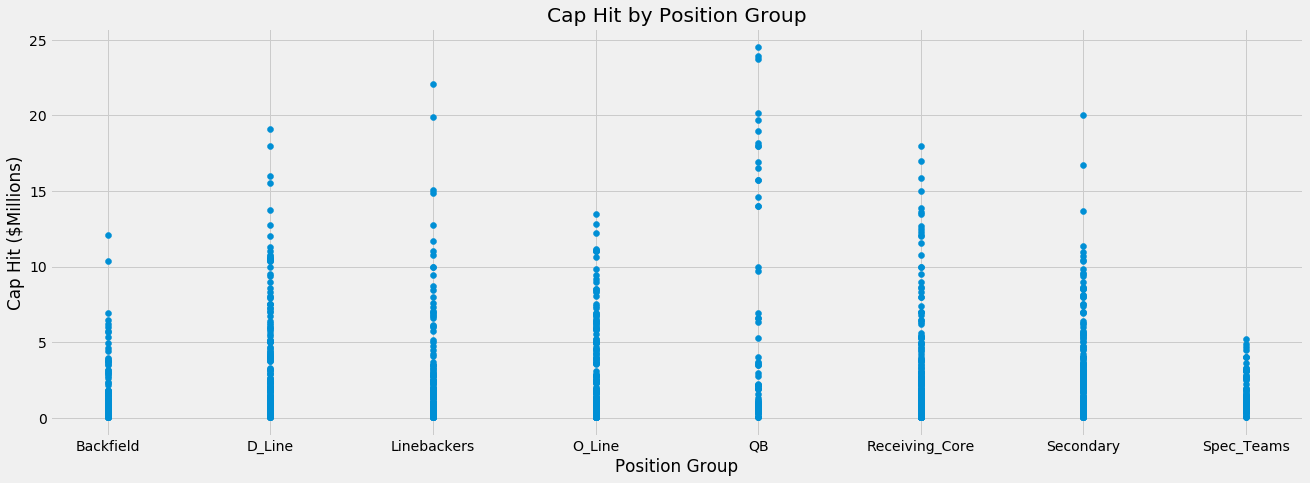

In [583]:
fig, ax = plt.subplots(figsize=(20,7))
ax.scatter(dfsal["Pos_Group"], dfsal["Cap_Hit_$Ms"])
ax.set_title("Cap Hit by Position Group")
ax.set_xlabel("Position Group")
ax.set_ylabel("Cap Hit ($Millions)")
plt.show()

The Quarterback difference is illustrated even more by the following boxplot:

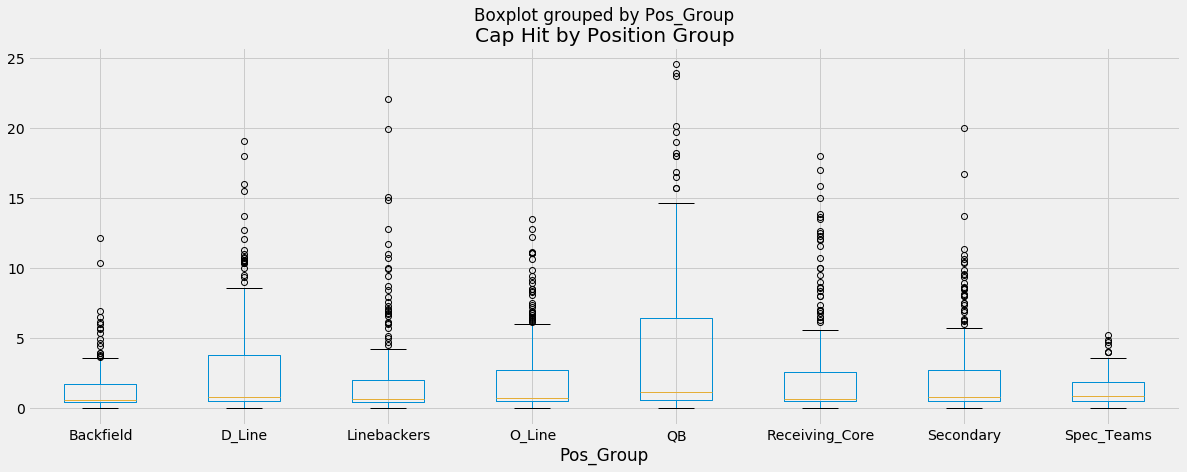

In [584]:
dfsal.boxplot(column = "Cap_Hit_$Ms",by = "Pos_Group",figsize=(20,7))
plt.title("Cap Hit by Position Group")
plt.show()

#### 15 Highest Paid Players by total Cap Hit
And, of the 15 highest paid players in the NFL, 9 are Quarterbacks, including 4 of the top 5.

In [585]:
dfsal[["Player","Team","Pos.","Cap_Hit_$Ms"]].set_index("Pos.").sort_values("Cap_Hit_$Ms",ascending=False).head(15)

,Player,Team,Cap_Hit_$Ms
Pos.,,,
QB,Joe Flacco,Ravens,24.550000
QB,Kirk Cousins,Redskins,23.943600
QB,Matt Ryan,Falcons,23.750000
OLB,Justin Houston,Chiefs,22.100000
QB,Cam Newton,Panthers,20.166666
CB,Josh Norman,Redskins,20.000000
OLB,Von Miller,Broncos,19.900000
QB,Eli Manning,Giants,19.700000
DT,Ndamukong Suh,Dolphins,19.100000


However, Quarterbacks make up only one position on the field. In terms of position groups, the defensive line is paid the most in terms of total cap hit across the NFL, followed closely by defensive secondary.

In [586]:
df_pos_group_sum= dfsal.set_index("Pos_Group").groupby('Pos_Group')['Cap_Hit_$Ms'].sum().sort_values(ascending=False).reset_index()
print(df_pos_group_sum.set_index("Pos_Group"))

                Cap_Hit_$Ms
Pos_Group                  
D_Line           674.907619
Secondary        670.705508
Receiving_Core   659.335236
O_Line           604.411413
Linebackers      475.865008
QB               414.200316
Backfield        208.038427
Spec_Teams       133.274135


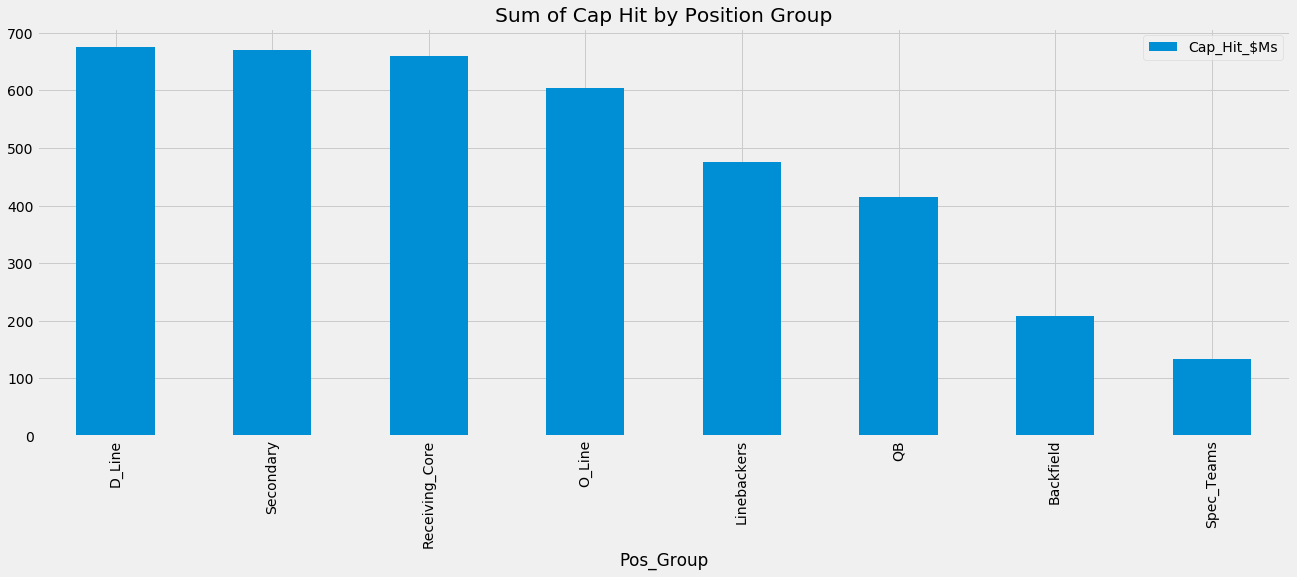

In [587]:
df_pos_group_sum.set_index("Pos_Group").plot.bar(figsize=(20,7))
plt.title("Sum of Cap Hit by Position Group")
plt.show()

Within mean salary for each position group, the quarterbacks are on top again, with the average QB (starter and backup) being paid about \$5M. Defensive lineman are second, being slightly more than half of quarterbacks: $2.7M.

In [588]:
df_pos_group_mean= dfsal.set_index("Pos_Group").groupby('Pos_Group')['Cap_Hit_$Ms'].mean().sort_values(ascending=False).reset_index()
print(df_pos_group_mean.set_index("Pos_Group"))

                Cap_Hit_$Ms
Pos_Group                  
QB                 4.990365
D_Line             2.699630
Receiving_Core     2.250291
O_Line             2.197860
Secondary          2.149697
Linebackers        1.982771
Backfield          1.454814
Spec_Teams         1.433055


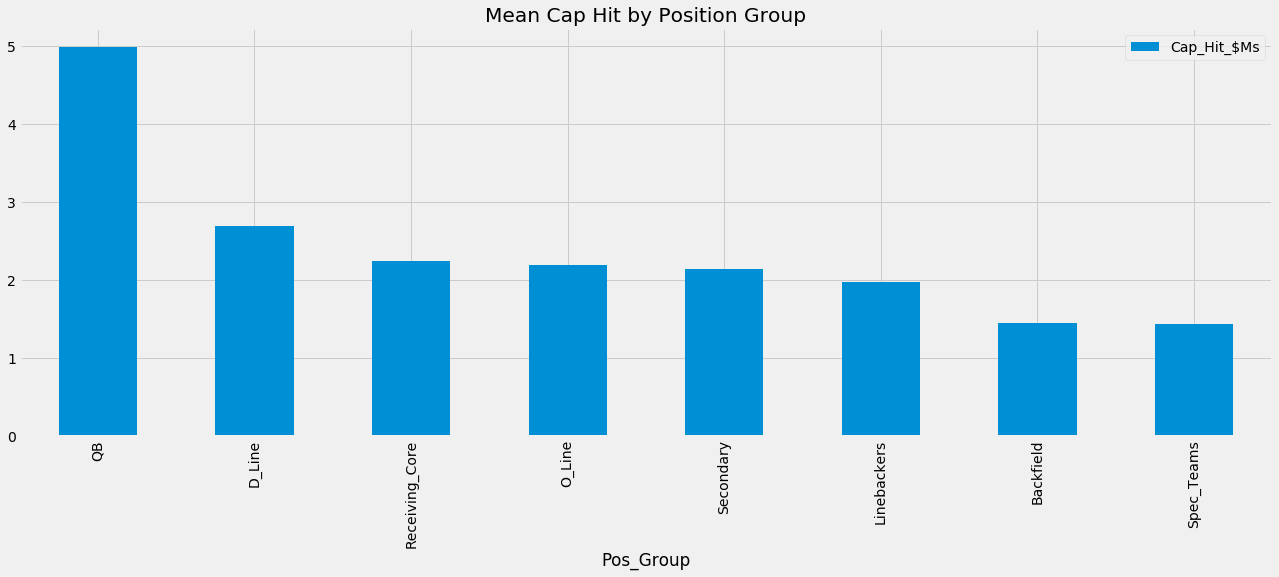

In [589]:
df_pos_group_mean.set_index("Pos_Group").plot.bar(figsize=(20,7))
plt.title("Mean Cap Hit by Position Group")
plt.show()

The following chart shows both the sum for each position group and the mean (multiplied by 100 for illustrative purposes). 

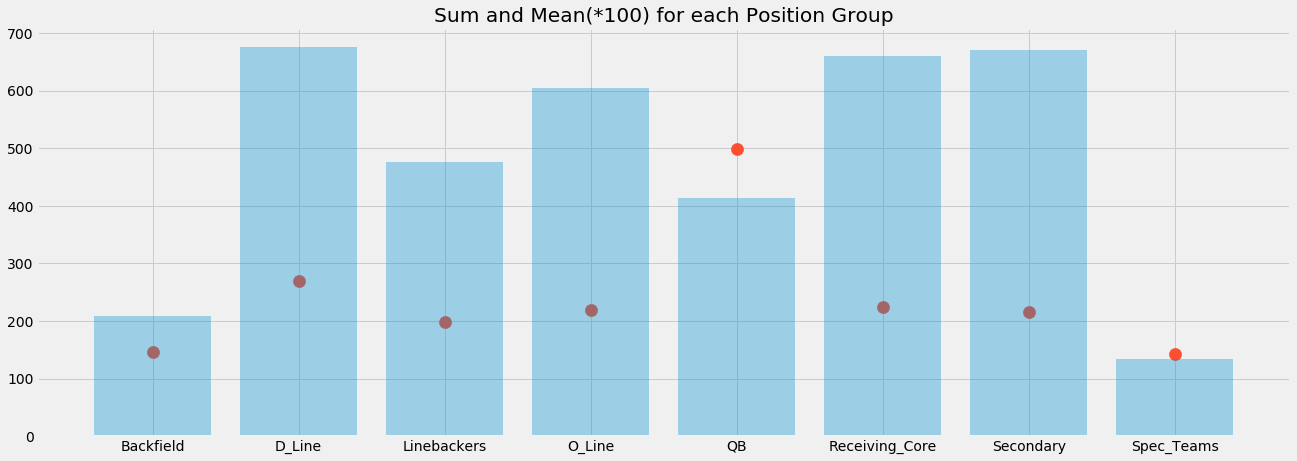

In [590]:
fig, ax = plt.subplots(figsize=(20,7)) 
ax.bar(df_pos_group_sum["Pos_Group"],df_pos_group_sum["Cap_Hit_$Ms"],alpha=0.35)
ax.scatter(df_pos_group_mean["Pos_Group"],df_pos_group_mean["Cap_Hit_$Ms"]*100,s=150)
ax.set_title("Sum and Mean(*100) for each Position Group")
plt.show()

## The Big Merge
The current dataframe has data listed by individual player. The rest of the analysis will focus on how $teams$ distribute their salary cap, so the dataframe must have team as the index with columns that represent positon groups, sides of the ball, etc. To do this, I created four new dataframes that are sorted by team and include the cap hit for the various categories, and later performed a many-to-one merge on the team index. The following code is the creation of new dataframes that will be merged:

In [591]:
df_team_spend= dfsal.set_index("Team").groupby('Team')['Cap_Hit_$Ms'].sum().sort_values(ascending=False).reset_index()
df_team_spend["Cap_Utilization_%"] = (df_team_spend["Cap_Hit_$Ms"] / 167) *100
df_t_s = dfsal.set_index("Team").groupby(['Team', 'Side'])['Cap_Hit_$Ms'].sum().reset_index()
df_t_s = df_t_s.pivot(index="Team",columns="Side",values="Cap_Hit_$Ms").reset_index()
df_t_s2 = dfsal.set_index("Team").groupby(['Team', 'Pos.'])['Cap_Hit_$Ms'].sum().reset_index()
df_t_s2 = df_t_s2.pivot(index="Team",columns="Pos.",values="Cap_Hit_$Ms").reset_index()
df_t_s3 = dfsal.set_index("Team").groupby(['Team', 'Pos_Group'])['Cap_Hit_$Ms'].sum().reset_index()
df_t_s3 = df_t_s3.pivot(index="Team",columns="Pos_Group",values="Cap_Hit_$Ms").reset_index()
df_t_s4 = dfsal.set_index("Team").groupby(['Team', '2nd_Pos_Group'])['Cap_Hit_$Ms'].sum().reset_index()
df_t_s4 = df_t_s4.pivot(index="Team",columns="2nd_Pos_Group",values="Cap_Hit_$Ms").reset_index()


#### Loading in the season results
In order to examine the effects of different salary allocations, I will load in the results from the 2017 season. The data comes from [Pro-Football-Reference](https://www.pro-football-reference.com), the most trusted data repository for NFL statistics.

In [592]:
results_url = "https://github.com/ChadT35/Data_Bootcamp_Final_Project/blob/master/NFLResults2017.xlsx?raw=true"
df_results = pd.read_excel(results_url) #Data frame listing all of the team season results
df_results

,City,Team,W,L,Playoffs?,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,New England,Patriots,13,3,Y,0.813,458,296,162,10.1,-1.2,8.9,6.3,2.6
1,Buffalo,Bills,9,7,Y,0.563,302,359,-57,-3.6,-0.5,-4.0,-3.0,-1.0
2,Miami,Dolphins,6,10,N,0.375,281,393,-112,-7.0,0.7,-6.3,-3.9,-2.4
3,New York,Jets,5,11,N,0.313,298,382,-84,-5.3,0.3,-4.9,-2.9,-2.1
4,Pittsburgh,Steelers,13,3,Y,0.813,406,308,98,6.1,-1.1,5.0,3.2,1.8
5,Baltimore,Ravens,9,7,N,0.563,395,303,92,5.8,-2.4,3.4,2.2,1.2
6,Cincinnati,Bengals,7,9,N,0.438,290,349,-59,-3.7,-1.3,-5.0,-4.1,-0.9
7,Cleveland,Browns,0,16,N,0.000,234,410,-176,-11.0,0.0,-11.0,-6.8,-4.1
8,Jacksonville,Jaguars,10,6,N,0.625,417,268,149,9.3,-2.8,6.5,3.0,3.6
9,Tennessee,Titans,9,7,Y,0.563,334,356,-22,-1.4,-2.1,-3.5,-2.0,-1.5


Now to merge all of these new dataframes on the team index...

**Note:** Because this analysis examines the effects of salary spending to on-field results, the data only includes data for **active  players** during the 2017 season and does NOT include data for injured reserve players or practice squad players. Beacuse of this, the salary cap utilization rate may seem low, but some teams had large cap space tied up in injured player contracts.

In [593]:
dfs = [df_team_spend, df_t_s,df_t_s3, df_t_s4,df_results ]
df_ts = reduce(lambda left,right: pd.merge(left,right,on='Team'), dfs)
df_ts

,Team,Cap_Hit_$Ms,Cap_Utilization_%,Def,Off,ST,Backfield,D_Line,Linebackers,O_Line,...,Playoffs?,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Jaguars,151.852626,90.929716,97.279494,52.083720,2.489412,13.856032,44.131852,12.755577,23.828773,...,N,0.625,417,268,149,9.3,-2.8,6.5,3.0,3.6
1,Titans,149.109415,89.287075,85.181937,56.642810,7.284668,8.746427,20.401036,31.337489,16.915259,...,Y,0.563,334,356,-22,-1.4,-2.1,-3.5,-2.0,-1.5
2,Falcons,146.513869,87.732856,64.647600,76.082935,5.783334,6.589417,30.713199,4.063684,19.194343,...,Y,0.625,353,315,38,2.4,1.9,4.3,1.1,3.2
3,Steelers,145.814413,87.314020,61.954255,82.090158,1.770000,13.050882,15.711547,11.477639,38.584612,...,Y,0.813,406,308,98,6.1,-1.1,5.0,3.2,1.8
4,Panthers,144.903005,86.768266,71.936796,67.386209,5.580000,11.726639,33.857368,17.045207,22.207258,...,Y,0.688,363,327,36,2.3,2.1,4.3,1.7,2.7
5,Raiders,144.377592,86.453648,62.128811,78.538781,3.710000,5.562298,13.787690,9.971805,34.649435,...,N,0.375,301,373,-72,-4.5,-0.2,-4.7,-3.0,-1.8
6,Rams,141.371844,84.653799,78.644258,60.376329,2.351257,6.256515,16.596445,33.636522,20.521212,...,Y,0.688,478,329,149,9.3,-0.2,9.2,8.2,1.0
7,Vikings,135.742794,81.283110,70.596515,63.568926,1.577353,4.535880,27.250680,9.900699,18.428959,...,Y,0.813,382,252,130,8.1,1.0,9.1,2.3,6.8
8,Redskins,130.905482,78.386516,60.342647,67.320335,3.242500,0.820532,9.524724,19.172234,11.934854,...,N,0.438,342,388,-46,-2.9,1.6,-1.3,0.5,-1.8
9,Eagles,130.626714,78.219589,73.811286,54.462781,2.352647,3.213300,35.593817,13.595294,27.354874,...,Y,0.813,457,295,162,10.1,-0.7,9.4,7.0,2.5


#### Finding the average team allocation
To find the average team allocation, I performed a mean operation on the dataframe and then extracted the primary position groups into a dictionary. I then used the dictionary to create a dataframe that could be easily viewed and manipulated.

In [594]:
df_avg = df_ts.mean()
df_ts_entry2 = {"D-Line":df_avg["D_Line"],"Secondary":df_avg["Secondary"],
                'Receiving Core':df_avg["Receiving_Core"],'O-Line':df_avg["O_Line"],
                "Linebackers":df_avg["Linebackers"],"QB":df_avg["QB"],
                'Backfield':df_avg["Backfield"],
                "Spec. Teams":df_avg["Spec_Teams"]}

The following dataframe displays the average allocation for all NFL teams. The "% of Average Total" column is calculated by dividing the cap hit by the average total salary for each team - roughly $120M.  Teams use about 17% of their cap on the D-Line, Secondary, and Receiving Core.

In [595]:
df_ts_manual = pd.DataFrame(data=df_ts_entry2,index = ["Cap"]).reindex()
df_ts_manual = df_ts_manual.transpose()
df_ts_manual.sort_values(by = "Cap",ascending=False,inplace=True)
df_ts_manual["% of Average Total"]= (df_ts_manual["Cap"] / 1.200231e+02) *100
df_ts_manual

,Cap,% of Average Total
D-Line,21.090863,17.572337
Secondary,20.959547,17.462928
Receiving Core,20.604226,17.166884
O-Line,18.887857,15.736851
Linebackers,14.870781,12.389933
QB,12.943760,10.784391
Backfield,6.501201,5.416625
Spec. Teams,4.164817,3.470013


Teams spend about $6M more for defensive players than offensive players.

In [596]:
print("Offense:", df_avg["Off"])
print("Defense:", df_avg["Def"])

Offense: 54.919229375
Defense: 60.9390058437


Bar chart displaying the average total spend for each position group:

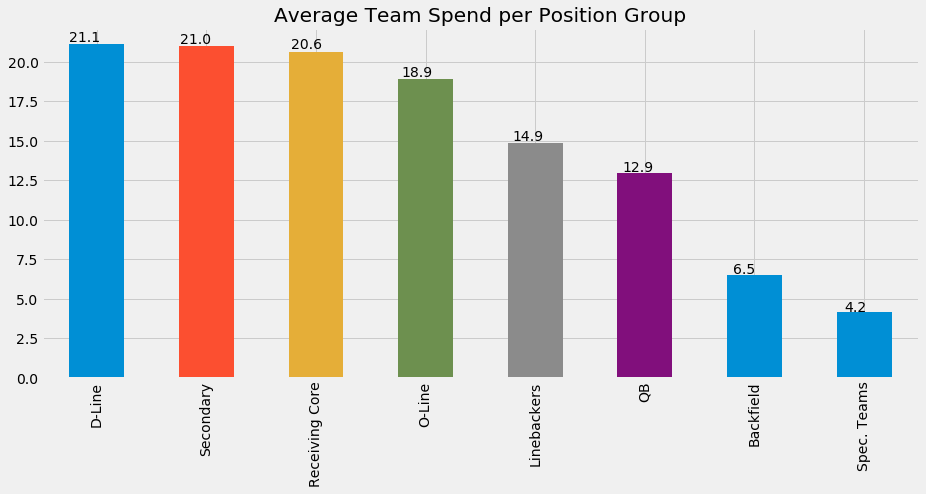

In [597]:
ax = df_ts_manual["Cap"].plot.bar(figsize=(14,6),width = 0.5,legend = False)
ax.set_title("Average Team Spend per Position Group")
for p in ax.patches:
    ax.annotate(str((round(p.get_height(),1))), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.show()

## Trends between Spending and Performance
The following section will investigate how spending among different position groups effects winning and team ratings.

#### Primary Position Groups vs. Wins
As seen below, correlation between wins and position group spending is much higher for offensive groups than defensive groups.

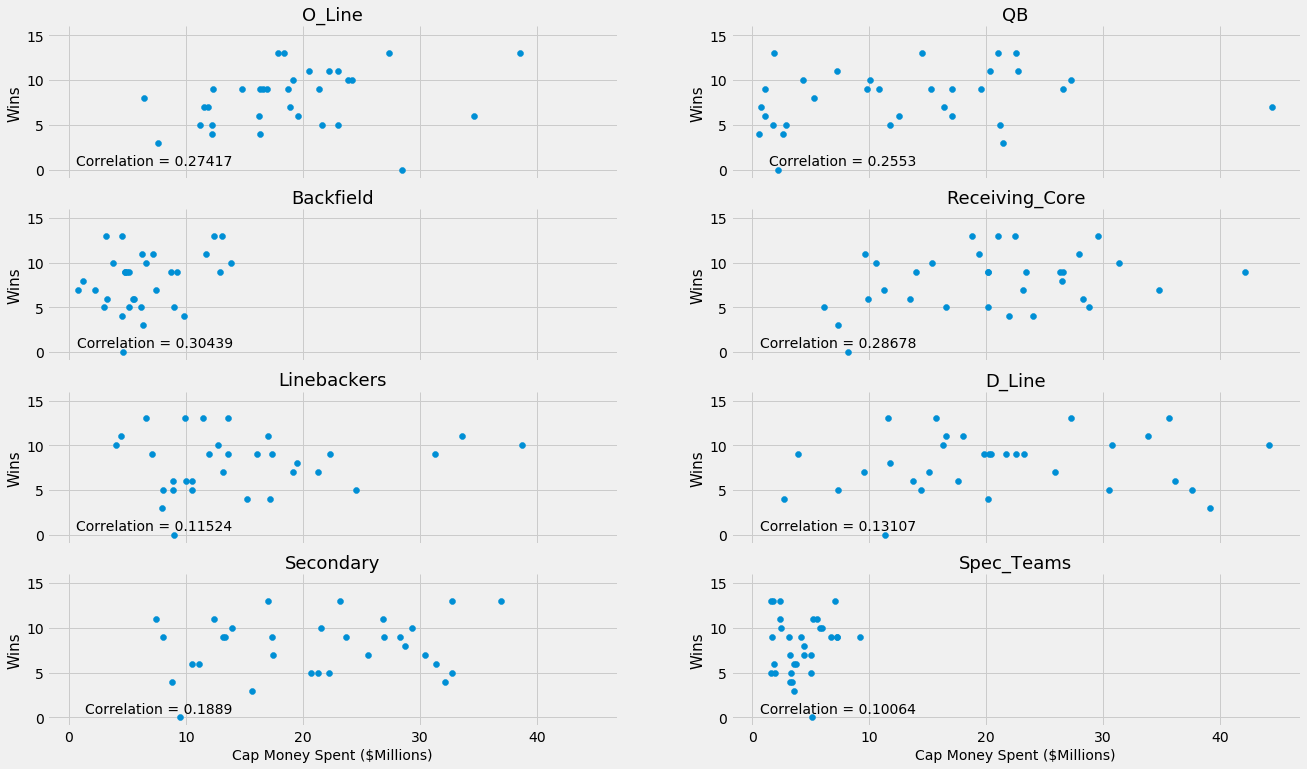

In [598]:
fig, ax = plt.subplots(nrows=4,ncols=2,sharex=True,figsize=(20,12))
ax=ax.ravel()
var_list = ["O_Line", "QB", "Backfield","Receiving_Core", "Linebackers", "D_Line", "Secondary", "Spec_Teams"]
count = 0
corr_mat = df_ts.corr()
for chart in ax:
    chart.scatter(df_ts[var_list[count]],df_ts["W"])
    chart.spines["right"].set_visible(False) 
    chart.spines["top"].set_visible(False)  
    chart.set_title(var_list[count], fontsize = 18) 
    chart.set_ylabel("Wins", fontsize = 15) 
    chart.set_ylim(-1,16)
    if count > 5: 
        chart.set_xlabel("Cap Money Spent ($Millions)",fontsize=14)
    cr = corr_mat.W[var_list[count]]
    message = "Correlation = " + str(round(cr,5)) 
    chart.text(14, 0.5, message, horizontalalignment='right') 
    count = count + 1
plt.show()

#### Secondary Position Groups vs Wins
**The first big finding:** Skill player positional spending is highly correlated with win total (0.49264).

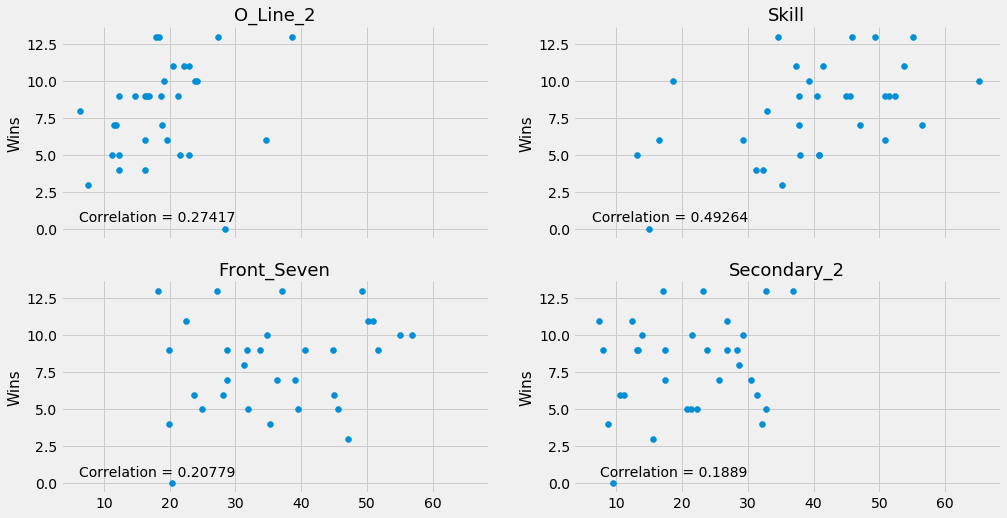

In [599]:
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(15,8))
ax=ax.ravel()
var_list = ["O_Line_2", "Skill", "Front_Seven", "Secondary_2"]
count = 0
corr_mat = df_ts.corr()
for chart in ax:
    chart.scatter(df_ts[var_list[count]],df_ts["W"])
    chart.spines["right"].set_visible(False) 
    chart.spines["top"].set_visible(False) 
    chart.set_title(var_list[count], fontsize = 18) 
    chart.set_ylabel("Wins", fontsize = 15) 
    if count > 5: 
        chart.set_xlabel("Cap Money Spent ($Millions)",fontsize=14)
    cr = corr_mat.W[var_list[count]]
    message = "Correlation = " + str(round(cr,5)) 
    chart.text(30, 0.5, message, horizontalalignment='right') 
    count = count + 1
plt.show()

#### SRS
The Simple Rating System (SRS) is a metric created by Pro-Football-Reference that assigns a rating to each team with 0 being average, positive numbers meaning better than average, and negative numbers meaning worse than average. The following chart will plot position group spending vs. SRS. Again, the correlations are considerably higher for offensive position groups than defensive position groups.

**Primary Position Groups vs. SRS**

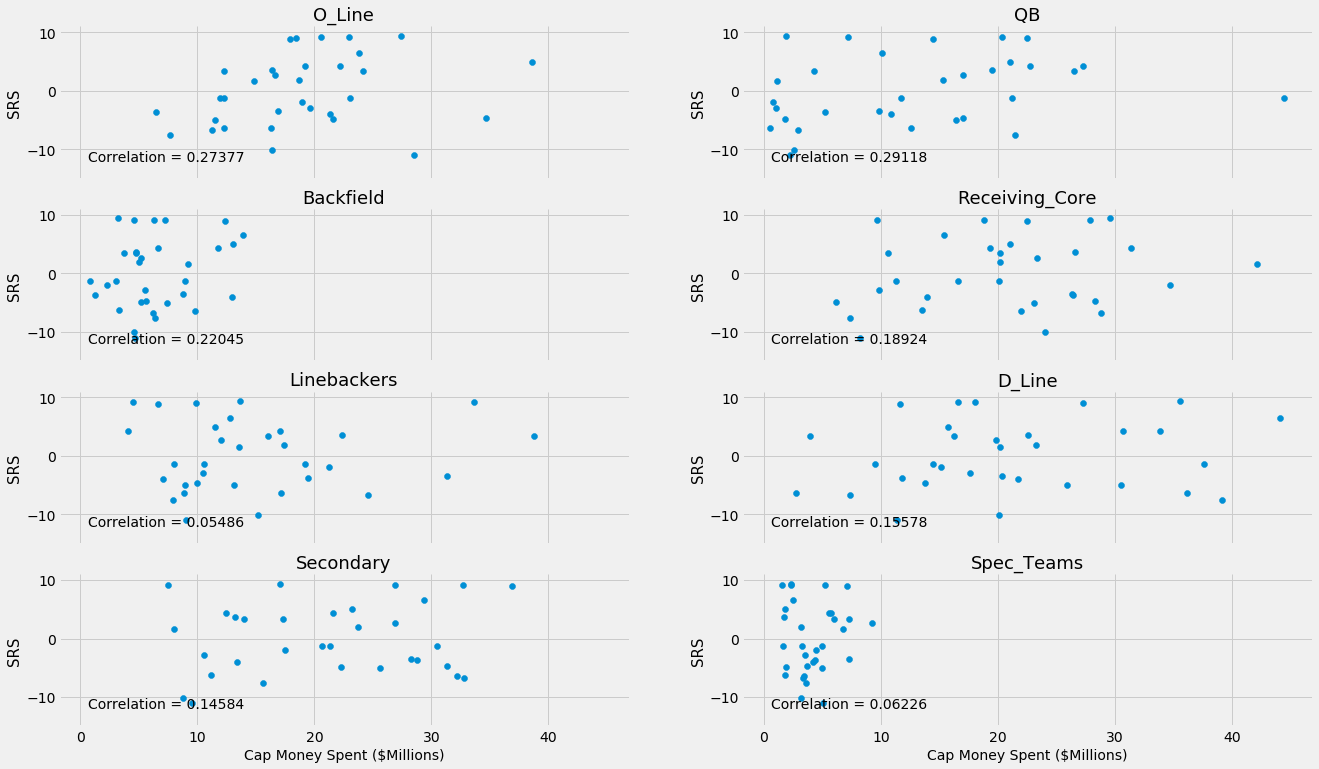

In [600]:
fig, ax = plt.subplots(nrows=4,ncols=2,sharex=True,figsize=(20,12))
ax=ax.ravel()
var_list = ["O_Line", "QB", "Backfield","Receiving_Core", "Linebackers", "D_Line", "Secondary", "Spec_Teams"]
count = 0
corr_mat = df_ts.corr()
for chart in ax:
    chart.scatter(df_ts[var_list[count]],df_ts["SRS"])
    chart.spines["right"].set_visible(False) 
    chart.spines["top"].set_visible(False)  
    chart.set_title(var_list[count], fontsize = 18) 
    chart.set_ylabel("SRS", fontsize = 15) 
    chart.set_ylim(-15,11)
    if count > 5: 
        chart.set_xlabel("Cap Money Spent ($Millions)",fontsize=14)
    cr = corr_mat.SRS[var_list[count]]
    message = "Correlation = " + str(round(cr,5)) 
    chart.text(14, -12, message, horizontalalignment='right')
    count = count + 1
plt.show()

**Secondary Position Groups vs. SRS**

Again, skill position spending seems to be the most noticeable trend with a .43 correlation with SRS.

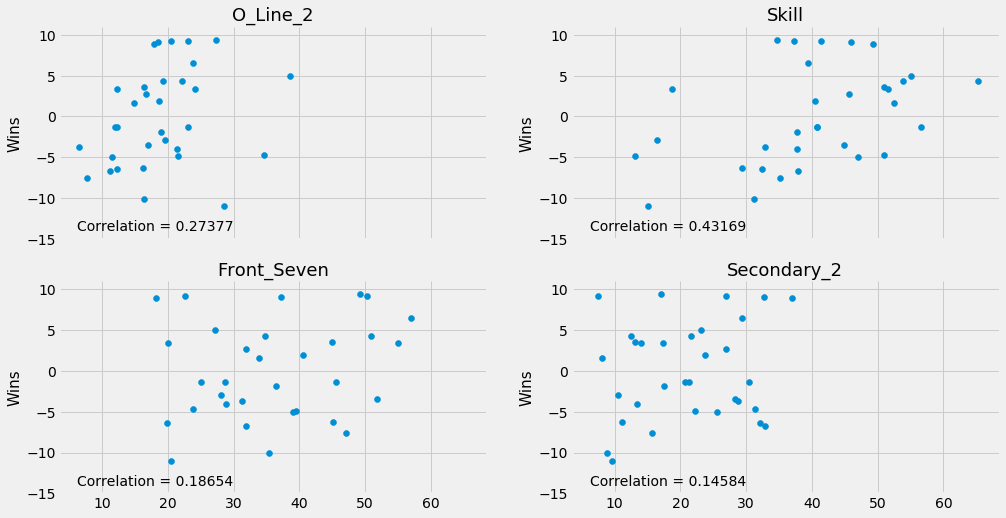

In [601]:
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(15,8))
ax=ax.ravel()
var_list = ["O_Line_2", "Skill", "Front_Seven", "Secondary_2"]
count = 0
corr_mat = df_ts.corr()
for chart in ax:
    chart.scatter(df_ts[var_list[count]],df_ts["SRS"])
    chart.spines["right"].set_visible(False) 
    chart.spines["top"].set_visible(False) 
    chart.set_title(var_list[count], fontsize = 18) 
    chart.set_ylabel("Wins", fontsize = 15)
    chart.set_ylim(-15,11)
    if count > 5: 
        chart.set_xlabel("Cap Money Spent ($Millions)",fontsize=14)
    cr = corr_mat.SRS[var_list[count]]
    message = "Correlation = " + str(round(cr,5)) 
    chart.text(30, -14, message, horizontalalignment='right') 
    count = count + 1
plt.show()

#### OSRS and DSRS
OSRS and DSRS work in the same way as SRS but are ratings of offensive (OSRS) and defensive (DSRS) strength. The following plots offensive position groups vs. OSRS. Again, skill players have the highest correlation with .30

Quarterback spending correlation is surprisingly low with only 0.14842 correlation. This is most likely due to teams spending highly on young quarterbacks who have the potential to be great but have not yet reached their potential.

**Offensive Position Groups vs. OSRS**

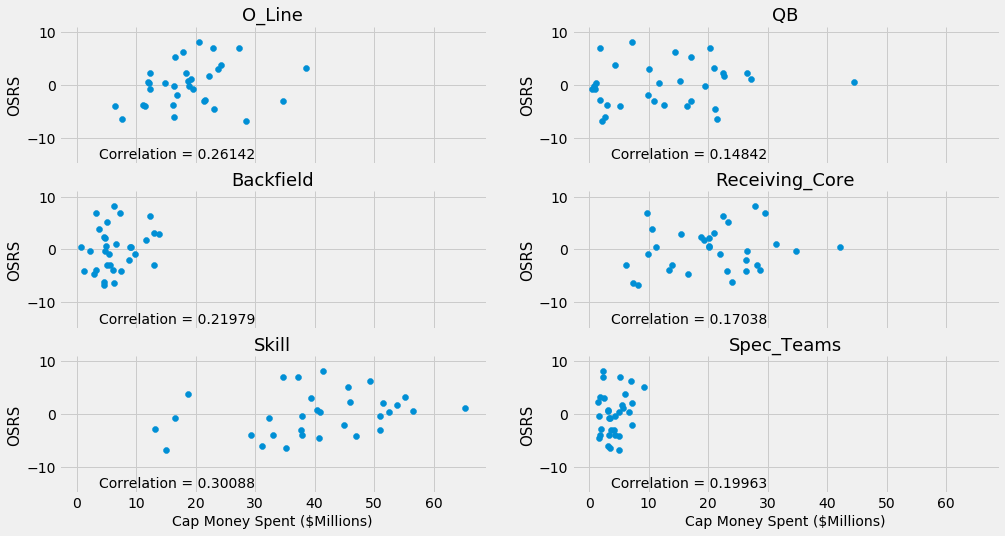

In [602]:
fig, ax = plt.subplots(nrows=3,ncols=2,sharex=True,figsize=(15,8))
ax=ax.ravel()
var_list = ["O_Line", "QB", "Backfield", "Receiving_Core","Skill","Spec_Teams"]
count = 0
corr_mat = df_ts.corr()
for chart in ax:
    chart.scatter(df_ts[var_list[count]],df_ts["OSRS"])
    chart.spines["right"].set_visible(False) 
    chart.spines["top"].set_visible(False) 
    chart.set_title(var_list[count], fontsize = 18) 
    chart.set_ylabel("OSRS", fontsize = 15)
    chart.set_ylim(-15,11)
    if count > 3: 
        chart.set_xlabel("Cap Money Spent ($Millions)",fontsize=14)
    cr = corr_mat.OSRS[var_list[count]]
    message = "Correlation = " + str(round(cr,5)) 
    chart.text(30, -14, message, horizontalalignment='right') 
    count = count + 1
plt.show()

**Defensive Pos Groups vs. DSRS**

Surprisingly, linebackers have a negative correlation with defensive SRS. Thus, teams who allocate their money to other positions (mostly D_line - .30 correlation) have a better defensive rating.

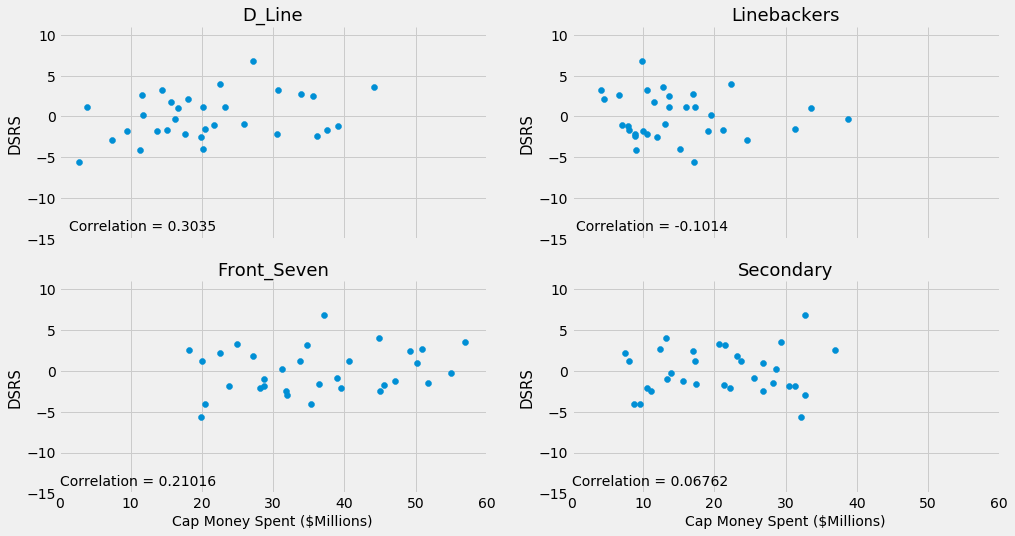

In [603]:
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(15,8))
ax=ax.ravel()
var_list = ["D_Line", "Linebackers", "Front_Seven", "Secondary"]
count = 0
corr_mat = df_ts.corr()
for chart in ax:
    chart.scatter(df_ts[var_list[count]],df_ts["DSRS"])
    chart.spines["right"].set_visible(False) 
    chart.spines["top"].set_visible(False) 
    chart.set_title(var_list[count], fontsize = 18) 
    chart.set_ylabel("DSRS", fontsize = 15)
    chart.set_ylim(-15,11)
    if count > 1: 
        chart.set_xlabel("Cap Money Spent ($Millions)",fontsize=14)
    cr = corr_mat.DSRS[var_list[count]]
    message = "Correlation = " + str(round(cr,5)) 
    chart.text(22, -14, message, horizontalalignment='right')
    count = count + 1
plt.show()

#### Points for and Points Against
Points For (PF) is the total amount that a team scores in a given season, while Points Against (PA) is the total number scored against the team. A high PF indicates a strong offense and a low PA indicates a strong defense.

**Points For vs. Offensive Positional Groups**

The pattern continues that spending on the backfield and receiving core (collectively "Skill") pays dividends on the field.

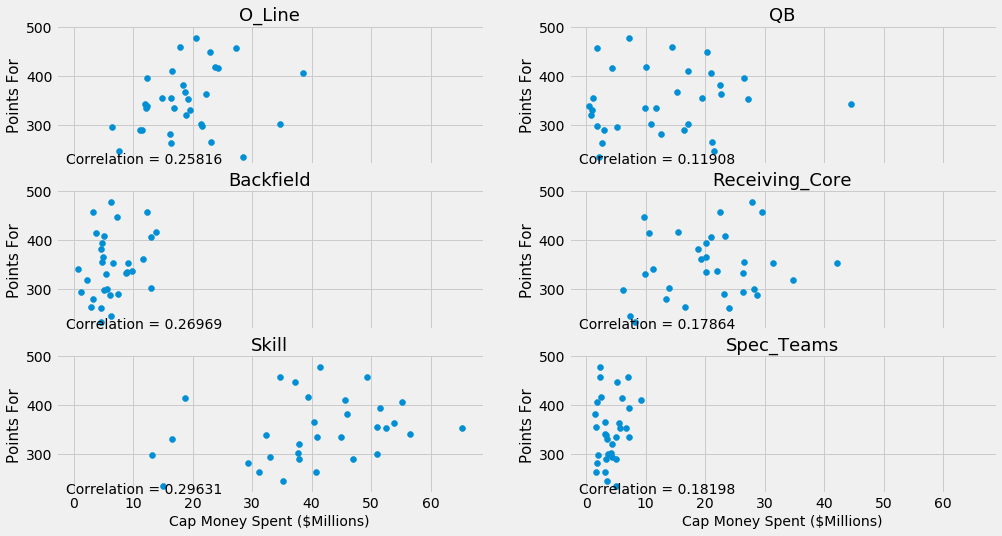

In [604]:
fig, ax = plt.subplots(nrows=3,ncols=2,sharex=True,figsize=(15,8))
ax=ax.ravel()
var_list = ["O_Line", "QB", "Backfield", "Receiving_Core","Skill","Spec_Teams"]
count = 0
corr_mat = df_ts.corr()
for chart in ax:
    chart.scatter(df_ts[var_list[count]],df_ts["PF"])
    chart.spines["right"].set_visible(False) 
    chart.spines["top"].set_visible(False) 
    chart.set_title(var_list[count], fontsize = 18) 
    chart.set_ylabel("Points For", fontsize = 15)
    chart.set_ylim(220,500)
    if count > 3: 
        chart.set_xlabel("Cap Money Spent ($Millions)",fontsize=14)
    cr = corr_mat.PF[var_list[count]]
    message = "Correlation = " + str(round(cr,5)) 
    chart.text(25, 220, message, horizontalalignment='right') 
    count = count + 1
plt.show()

**Defensive Position Groups vs. Points Against**

For defense, teams want as few points against as possible, so it makes sense that we are seeing **negative correlation** for defensive positional spending. The D-Line again seems to be the best way to spend defensive money, correlation = 0.25.

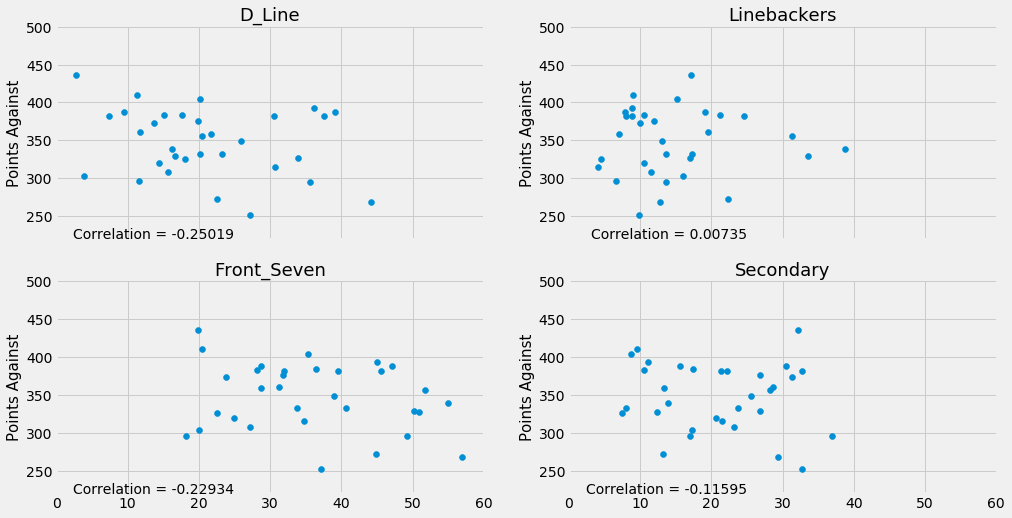

In [605]:
fig, ax = plt.subplots(nrows=2,ncols=2,sharex=True,figsize=(15,8))
ax=ax.ravel()
var_list = ["D_Line", "Linebackers", "Front_Seven", "Secondary"]
count = 0
corr_mat = df_ts.corr()
for chart in ax:
    chart.scatter(df_ts[var_list[count]],df_ts["PA"])
    chart.spines["right"].set_visible(False) 
    chart.spines["top"].set_visible(False) 
    chart.set_title(var_list[count], fontsize = 18) 
    chart.set_ylabel("Points Against", fontsize = 15)
    chart.set_ylim(220,500)
    if count > 3: 
        chart.set_xlabel("Cap Money Spent ($Millions)",fontsize=14)
    cr = corr_mat.PA[var_list[count]]
    message = "Correlation = " + str(round(cr,5)) 
    chart.text(25, 220, message, horizontalalignment='right') 
    count = count + 1
plt.show()

### Total Spending vs. Team Performance
Now that we have compared positional groups to different success metrics, let's take a look at total team spending vs. team performance. 

The correlations are much stronger here. Point differential is a simple equation that subtracts Points Against from Points Allowed. The following graphic plots Team Spending vs Point Differential and yields a 0.55 correlation.

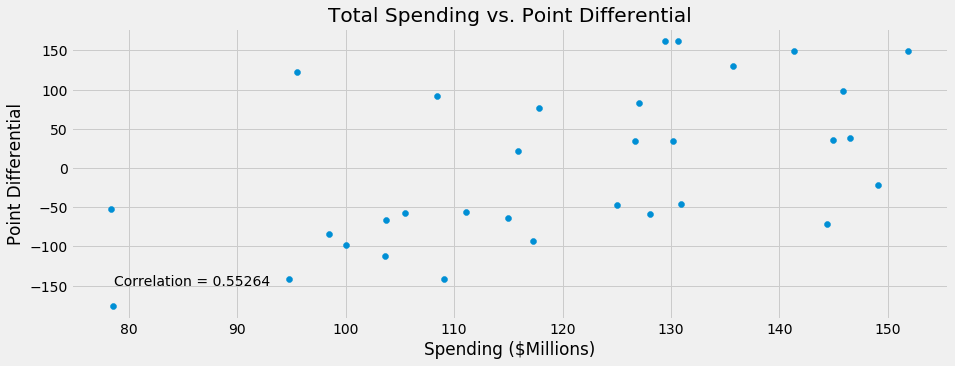

In [606]:
fig, ax = plt.subplots(figsize=(14,5))
corr_mat = df_ts.corr()
ax.scatter(df_ts["Cap_Hit_$Ms"], df_ts["PD"])
ax.set_title("Total Spending vs. Point Differential")
ax.set_xlabel("Spending ($Millions)")
ax.set_ylabel("Point Differential")
cr = corr_mat.PD["Cap_Hit_$Ms"]
message = "Correlation = " + str(round(cr,5)) 
ax.text(93, -150, message, horizontalalignment='right')
plt.show()

The following graphic plots total spending vs. SRS, and the correlation is about the same as point differential. This is not surprising as Point Differential is a variable within SRS.

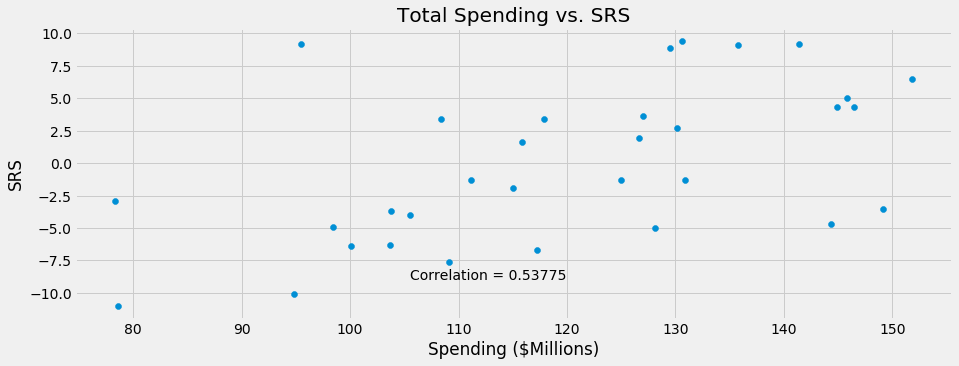

In [607]:
fig, ax = plt.subplots(figsize=(14,5))
corr_mat = df_ts.corr()
ax.scatter(df_ts["Cap_Hit_$Ms"], df_ts["SRS"])
ax.set_title("Total Spending vs. SRS")
ax.set_xlabel("Spending ($Millions)")
ax.set_ylabel("SRS")
cr = corr_mat.SRS["Cap_Hit_$Ms"]
message = "Correlation = " + str(round(cr,5)) 
ax.text(120, -9, message, horizontalalignment='right')
plt.show()

Following previous patterns, Defensive spending vs. Defensive SRS does not yield a high correlation, only 0.26.

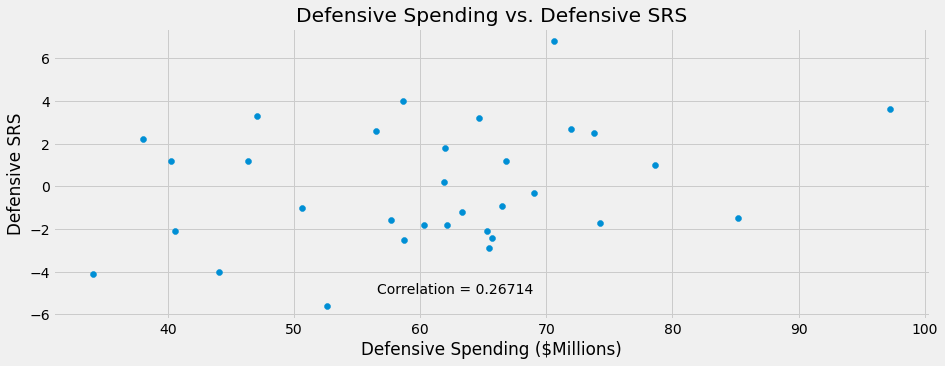

In [608]:
fig, ax = plt.subplots(figsize=(14,5))
corr_mat = df_ts.corr()
ax.scatter(df_ts["Def"], df_ts["DSRS"])
ax.set_title("Defensive Spending vs. Defensive SRS")
ax.set_xlabel("Defensive Spending ($Millions)")
ax.set_ylabel("Defensive SRS")
cr = corr_mat.DSRS["Def"]
message = "Correlation = " + str(round(cr,5)) 
ax.text(69, -5, message, horizontalalignment='right')
plt.show()

Offensive spending vs. Offensive SRS has a higher correlation with 0.38.

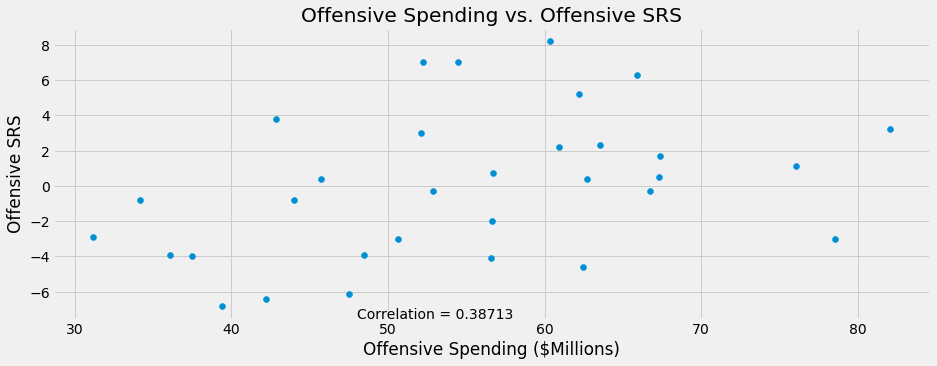

In [609]:
fig, ax = plt.subplots(figsize=(14,5))
corr_mat = df_ts.corr()
ax.scatter(df_ts["Off"], df_ts["OSRS"])
ax.set_title("Offensive Spending vs. Offensive SRS")
ax.set_xlabel("Offensive Spending ($Millions)")
ax.set_ylabel("Offensive SRS")
cr = corr_mat.OSRS["Off"]
message = "Correlation = " + str(round(cr,5)) 
ax.text(58, -7.5, message, horizontalalignment='right')
plt.show()

## Conclusion and Findings
**1) Quarterbacks are the highest paid**: No matter how you slice it, quarterbacks are paid, on average, twice as much as any other position. This is to be expected because the QB is generally regarded as the most important position.

**2) Defensive line is the highest paid positional group**: Despite only having four positions on the defensive line, the D-Line (starters and backups) are paid a collective average of $20M. Defensive secondary is a close second.

**3) Skill players have the highest return on salary **: With a correlation of 0.49 for Wins, 0.43 for SRS, 0.30 for OSRS, and 0.29 for Points for, skill position spending stands out far above any other group in terms of correlation to on-field success. Traditional football philosophy considers skill players to be the icing on the cake, with QBs and Offensive Lineman creating the true success. However, in both SRS correlation (.43 to .27) and OSRS correlation (0.30 to 0.26), higher skill player salaries are more correlated with success.

**4) Linebackers have the lowest return **: Although LBs weakness does not stand out as much as the Skill strength, linebackers seem to have a low (and sometimes negative (-.10 vs. DSRS)) correlation with both team and defensive success.

**5) Teams that spend more on active players have more general success **: As expected, if the active player payroll is higher, teams are much better in Point Differential (0.55) and SRS (0.53).

Thank you!